# OASIS INFOBYTE TASK 1: IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\admin\Downloads\iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.drop('Id',inplace=True,axis=1)

In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [10]:
data["Species"].replace({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2},inplace=True)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
data["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# DATA VISUALISATION

In [12]:
x=data.corr()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


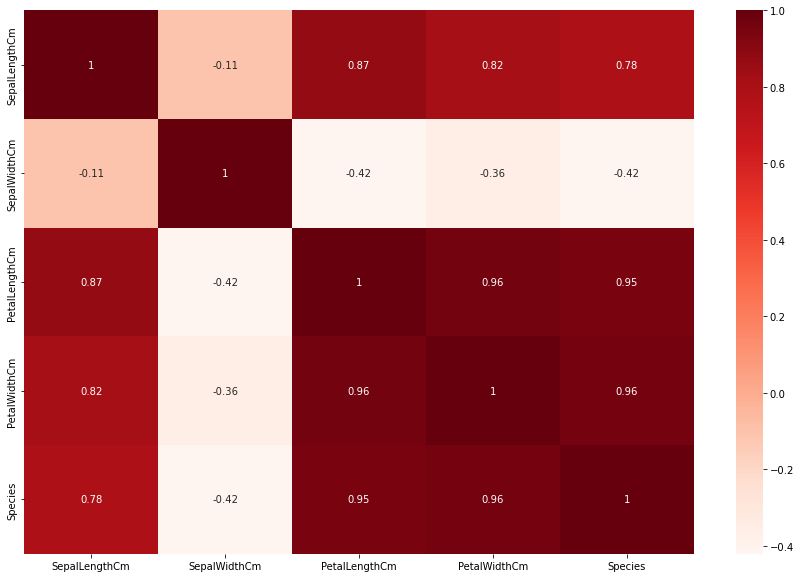

In [13]:
plt.figure(figsize=(15,10))
#heatmap=sns.heatmap(x,linewidth=1,annot=True,cmap=plt.cm.Blues)
heatmap=sns.heatmap(x,cmap="Reds",annot=True)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='count'>

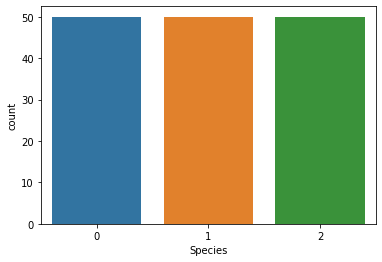

In [14]:
sns.countplot(data["Species"])

Text(0, 0.5, 'petalwidth')

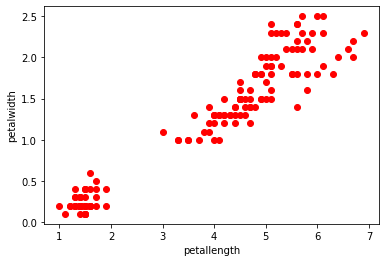

In [15]:
plt.scatter(data.PetalLengthCm,data.PetalWidthCm,color="r")
plt.xlabel("petallength")
plt.ylabel("petalwidth")

Text(0, 0.5, 'sepalwidth')

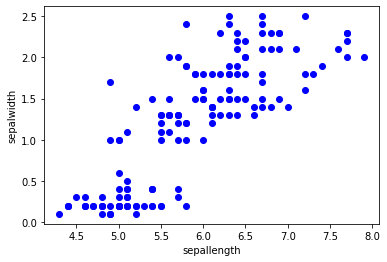

In [16]:
plt.scatter(data.SepalLengthCm,data.PetalWidthCm,color="b")
plt.xlabel("sepallength")
plt.ylabel("sepalwidth")

<AxesSubplot:>

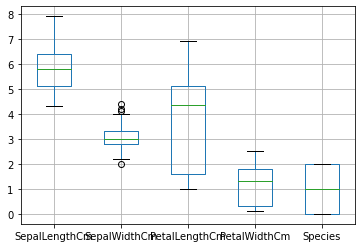

In [17]:
data.boxplot()

<AxesSubplot:ylabel='SepalWidthCm'>

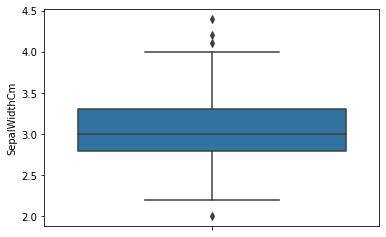

In [18]:
sns.boxplot(data=data,y="SepalWidthCm")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Density'>

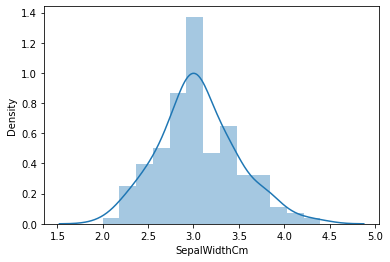

In [19]:
sns.distplot(data["SepalWidthCm"])

In [20]:
upperboundry=data["SepalWidthCm"].mean()+3*data["SepalWidthCm"].std()
lowerboundry=data["SepalWidthCm"].mean()-3*data["SepalWidthCm"].std()
print(lowerboundry,upperboundry)

1.7532170659134796 4.354782934086522


In [21]:
data.loc[data["SepalWidthCm"]>4.354782934086522,"SepalWidthCm"]=4.354782934086522
data.loc[data["SepalWidthCm"]<1.7532170659134796,"SepalWidthCm"]=1.7532170659134796

In [22]:
data.skew()

SepalLengthCm    0.314911
SepalWidthCm     0.318370
PetalLengthCm   -0.274464
PetalWidthCm    -0.104997
Species          0.000000
dtype: float64

# model building

In [23]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

# decision tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
dt_p=dt.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix

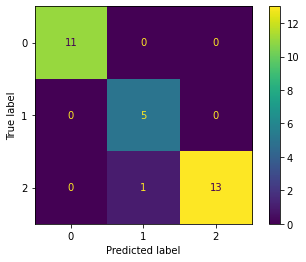

In [30]:
labels = [0,1,2]
cd=confusion_matrix(dt_p,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cd, display_labels=labels)
disp.plot();

In [33]:
dt_acc1=cd.diagonal().sum()/cd.sum()*100
dt_acc1

96.66666666666667

In [34]:
from sklearn.metrics import classification_report

In [35]:
 print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91         5
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [37]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
rf_p=rf.predict(x_test)

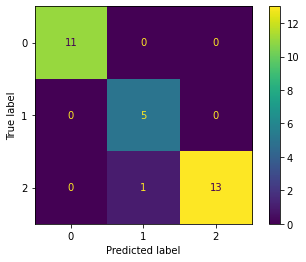

In [39]:
labels = [0,1,2]
cf=confusion_matrix(rf_p,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=labels)
disp.plot();

In [40]:
rf_acc=cf.diagonal().sum()/cf.sum()*100
rf_acc

96.66666666666667

In [41]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.83      1.00      0.91         5
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.94      0.98      0.96        30
weighted avg       0.97      0.97      0.97        30



# KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=24)

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [44]:
k_p=knn.predict(x_test)
k_p

array([2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2], dtype=int64)

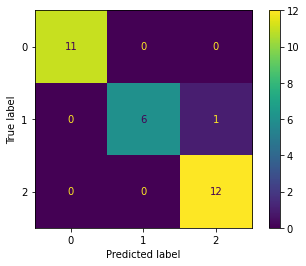

In [45]:
labels = [0,1,2]
ck=confusion_matrix(k_p,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=ck, display_labels=labels)
disp.plot();

In [46]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

96.66666666666667

In [47]:
print(classification_report(k_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.86      0.92         7
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



# svm

In [48]:
from sklearn.svm import SVC
svc=SVC()

In [49]:
svc.fit(x_train,y_train)

SVC()

In [50]:
s_p=svc.predict(x_test)
s_p

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2], dtype=int64)

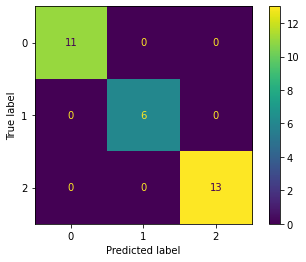

In [51]:
labels = [0,1,2]
cs=confusion_matrix(s_p,y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cs, display_labels=labels)
disp.plot();

In [52]:
print(classification_report(s_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [53]:
#svc is best model for prection of cardiovascular disaese

# prediction using test data

In [54]:
# Predict the label of a new data point
new_data = [5.9, 3.0,5.1,1.8]
y_pred = svc.predict([new_data])
# Print the predicted label
print('Predicted label:', y_pred[0])
if y_pred[0] == 2:
    print("Iris verginica")
elif y_pred[0] == 1:
    print("Iris-versicolor")
else:
    print("Iris Setisa")

    

Predicted label: 2
Iris verginica


# Thank you